# Numerical Solutions to the Diffusion Equation in 1-D  

## Mathematical Problem
The diffusion equation in one dimension ($x$) is   

\begin{align}
  \frac{\partial u}{\partial t}  =  \kappa \frac{\partial^2 u}{\partial x^2} s 
  \label{eq:Diff}
\end{align}
where $u(x,t)$ is a scalar field and $\kappa$ is the diffusivity. 

To solve this equation, numerically or analytically, we need an initial condition at $t_0$, 
\begin{align}
u(x,t_0) = \eta(x)
\end{align}
and boundary conditions 
\begin{align}
\begin{aligned}
u(0,t) &= u(L,t) \;\; \text{for} \;\; t>0\\
u(L,t) &= u(0,t) \:\;\; \text{for} \;\; t>0\\
\end{aligned}
\end{align}
in this case periodic boundary conditions on the domain $0 \leq x \leq L$ (_LeVeque,_  2002). 


## Numerical Approach 

We will aplly finite differences on a discrete grid with grid points $(x_i, t_j)$ where
\begin{align}
  x_i = i h && t_j = j k. 
\end{align}
Here $h = \Delta x$ is the grid cell spacing and $k = \Delta t$ is the time step, with $U^i_j \approx u(x_i, t_j)$ being the numerical approximation at $(x_i, t_j)$.

A classical forward in time one-step approach for solving the diffusion equation is the _Crank-Nicolson_ method  

\begin{align}  
  \frac{U_i^{j+1} - U_i^{j}}{\Delta t} &= \kappa \frac{1}{2} \left( D_{xx} U_i^{j+1} + D_{xx} U_i^{j}\right)
\end{align}  

where $D_{xx}$ is the discrete differential operator for the second derivative (_LeVeque,_  2002). Expanding the second derivative with centered differences   

\begin{align}  
  \frac{U_i^{j+1} - U_i^{j}}{\Delta t} &= \frac{\kappa}{2 \Delta x^2} \left( U_{i+1}^{j+1} - 2U_i^{j+1} + U_{i-1}^{j+1} + U_{i+1}^{j} - 2 U_{i}^{j} + U_{i-1}^{j}\right)
\end{align}   

can be rearranged as 

\begin{align}  
  U_i^{j+1} &= U_i^{j} + \frac{\kappa \Delta t}{2 \Delta x^2} \left( U_{i+1}^{j+1} - 2U_i^{j+1} + U_{i-1}^{j+1} + U_{i+1}^{j} - 2 U_{i}^{j} + U_{i-1}^{j}\right)
\end{align}  

or   

\begin{align}  
  -r U_{i-1}^{j+1} + (1+2r)\;U_i^{j+1} -r U_{i+1}^{j+1}&= r U_{i-1}^{j} + (1-2r)\;U_i^{j} + r U_{i+1}^{j}
  \label{eq:unp1l}
\end{align}
  
where $ r = \left. \kappa \Delta t \middle/ 2 \Delta x^2 \right.$. This is an _implicit_ method since the solution for $U_n^{j+1}$ depends on both $U_n^{j}$ and itself ($U_n^{j+1}$). The method gives a tridiagonal system of equations to solve for all $U_n^{j+1}$ values simultaneously. Equation \ref{eq:unp1l} above holds for the interior points $i = 1, \ldots, i-1$, but not on the boundaries $i = 0,L$. We must look at the the discrete equation in more detail at those points. At $i=0$   

\begin{align}  
 -r U_{-1}^{j+1} + (1+2r)\;U_0^{j+1} -r U_{1}^{j+1} &= r U_{-1}^{j} + (1-2r)\;U_0^{j} + r U_{1}^{j},
\end{align}

given our periodic boundary conditions $U_{-1} \equiv U_{m}$, and therefore 

\begin{align}  
 (1+2r)\;U_0^{j+1} -r U_{1}^{j+1} -r U_{m}^{j+1} +  &=  (1-2r)\;U_0^{j} + r U_{1}^{j} + r U_{m}^{j}.
\end{align}

Again, using the periodic boundary conditions we are left with

\begin{align}
 -r U_{0}^{j+1} -r U_{L-1}^{j+1} + (1+2r)\;U_L^{j+1} &= r U_{0}^{j} + r U_{L-1}^{j} + (1-2r)\;U_L^{j} 
\end{align}  

at $i=L$. Using both boundary conditions the system of equations in matrix form is 

$$
\begin{bmatrix}
    (1+2 r)  & -r &  &  &  &  -r\\
    -r & (1+2 r) & -r &  &  &  \\
     & -r & (1+2 r) & -r &  &   \\
     &  & \ddots & \ddots & \ddots &  \\
     &  & & -r & (1+2 r) & -r \\
     -r &  & &    & -r & (1+2 r) 
    \end{bmatrix}
    \begin{bmatrix}
    U_1^{n+1} \\
    U_2^{n+1} \\
    U_3^{n+1} \\
    \vdots \\
    U_{m-1}^{n+1} \\
    U_{m}^{n+1}
    \end{bmatrix} =
    \begin{bmatrix}
    (1-2r)\;U_1^{j} + r U_{2}^{j} + r U_{-1}^{j}\\
    r U_{1}^{j} + (1-2r)\;U_2^{j} + r U_{3}^{j} \\
    r U_{2}^{j} + (1-2r)\;U_{3}^{j} + r U_{4}^{j} \\
    \vdots \\
    r U_{m-2}^{j} + (1-2r)\;U_{m-1}^{j} + r U_{m}^{j} \\
    rU_{0}^{j} + r U_{m-1}^{j} + (1-2r)\;U_{m}^{j}  
    \end{bmatrix} .
$$

How to best solve this linear system of equations is a question worth diving deeper into. The linear system above is (nearly) tridiagonal, meaning it only has entries on the main-, sub-, and super- diagonal positions, plus the corners due to the periodic boundary conditions. A general linear system of equations is typically of form $Ax = b$, where $A \in {\rm I\!R}^{M\times N}$, $b$ is the known vector, and $x$ is the unknown vector in question (here $U^{j+1}$). The trivial way to solve this linear system is through matrix inversion 
$$
x = A^{-1}b
$$
which in and of it self is an ill-conditioned problem, but none the less takes $\cal{O}(n^3)$ operations ( _Trefethen and Bau,_ 1997 ). Another naive solution might be Gaussian Elimination that also takes $\cal{O}(n^3)$ operations ( _Trefethen and Bau,_ 1997 ). 

Since we are using an _implicit_ scheme, we will want to use an iterative solver. One could exploit the fact that this matrix is (nearly) tridiagonal and use a slight variation of extremely efficient __Thomas algorithm__ with a complexity of $\cal{O}(n)$, but we do not implement said method. Instead we use the conjugate gradient method since $A$ is symmetric positive definite, as discussed later. 

#### Stability 

The _Crank-Nicolson_ scheme is stable for all $\Delta x$ and $\Delta t$, but a common condition for ensuring accuracy of the solution is
\begin{equation}\label{eq:}
  \Delta t = (\sigma \Delta x)^2 / \kappa
\end{equation}
where $\sigma$ is the Courant number, discussed in detail in the next notebook ( _LeVeque,_  2002 , _Langtangen and  Linge,_ 2017 ).

## Python Implementation 

Here we implement the Crank-Nicolson method for the 1-D diffusion equation as both a native python solution and object oriented method. The object oriented method defines a `Diffusion` class that allows for easily reproducible results and implementation in later experiments with the advection-diffusion equation.   



In [2]:
# Global
import sys 
import numpy as np 
from scipy import linalg as LA
import matplotlib.pyplot as plt
from scipy.sparse import linalg as SLA

# Local
sys.path.append('../')
from advdiff.plot import animation

First, we select an initial condition ($u(x,0) = \eta$), such that it satisfies Eqn. \ref{eq:Diff}. Following  _Langtangen and  Linge,_ (2016) the diffusion equation admits 
\begin{align}
  u(x,t) = \frac{1}{\sqrt{4 \kappa \pi t}} \exp \left(- \frac{(x-\mu)^2}{4 \kappa t} \right)
  \label{eq:GaussPulse}
\end{align}
as a solution. At $t=0$ Eqn. \ref{eq:GaussPulse} is the Dirac delta function. Therefore we start the solution at $t_0=t_\epsilon$ such that $t = t + t_\epsilon$ ( _Langtangen and  Linge,_ 2016). We choose the pulse to be centered at $x=0.5$ on the domain $0\leq x \leq 1$.

In [3]:
# Inital Condition
def η(x, t, κ=3e-3, μ = 0.5):
    return (4*κ*np.pi*t)**-0.5*np.exp(-(x-μ)**2/(4*κ*t))

Next, we define numerical parameters and define variables pertinent to diffusion equation (_i.e._ $\kappa$).

In [4]:
#################   Init. Constant   ###################
κ  = 3e-2                  # Diffusivity 
L  = 1.                    # Domain Length 
nx = 200                   # Num. grid cells
dx = L/(nx-1)              # grid spacing

nt = 100                   # Num time steps
σ  = 1                     # courant number
dt = (σ*dx)**2/κ           # time step 

Then using our defined numerical parameters we generate the model domain, impose our initial condition and generate the left and right matrices ($A$ and $B$). We enforce our periodic boundary condition by appending values to $-r$ or $r$ to the top-right and bottom-left corners of $A$ and $B$, respectively. 

In [5]:
##################   Init. Domain   ####################
r  = (κ*dt)/(2*dx**2)      # matrix const.
x  = np.linspace(dx,L,nx)  # spatial grid
U  = np.zeros((nt,nx))     # solution array
U[0,:] = η(x,0.01,κ)       # init. condition
u  = U.copy()              # Analytical Sol. Arr

# Right Matrix (A)
A = np.diagflat([[(1+2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (-r)  for __ in range(nx-1)]],1) +\
    np.diagflat([[  (-r)  for __ in range(nx-1)]],-1)
A[0,-1] = -r               # Periodic Boundary Cond. (PBC)
A[-1,0] = -r               # PBC

# Left Matrix (B)
B = np.diagflat([[(1-2*r) for __ in range(nx)]]) + \
    np.diagflat([[  (r)   for __ in range(nx-1)]],1) +\
    np.diagflat([[  (r)   for __ in range(nx-1)]],-1)
B[0,-1] = r                # PBC
B[-1,0] = r                # PBC

A matrix can only have Cholesky Decomposition if it is positive definite (PD, _Trefethen and Bau,_ 1997 ). Therefore we can test whether our matrix is PD by using the `try` error handler. If an error is raised, that means the Cholesky Decomposition failed and our matrix is not PD. Further, a matrix is symmetric when $A^{\rm T}A = A A^{\rm T}$. Therefore we can test if this is true to determine whether our matrix is symmetric positive definite. 

In [6]:
try :
    LA.cholesky(A)
    
    if LA.norm(A.T@A - A@A.T) == 0: 
        print('\t A is symmetric positive definite (SPD)')
    else:
        print('\t A is positive definite but not symmetric ')
        
except LinAlgError:
     print('\t A is not positive definite - Cholesky decomposition cannot be compute')

	 A is symmetric positive definite (SPD)


Since $A$ is SPD we will use the conjugate gradient solver from `scipy` to solve our linear system. The solution to the diffusion equation at a forward  timestep should similar to the solution at a previous timestep. Therefore, we use the solution at the previous timestep $U^{t}$ as our starting guess for the conjugate gradient iteration at $U^{t+1}$ (the third positional argument in `SLA.cg`). This should increase the effiency of the iterative solver dramatically, since by default the `SLA.cg` uses the null vector ($x_0=\vec 0$) as its starting guess ( _Trefethen and Bau,_ 1997). This in practice decreases the number of iterations required to reach the desired tolerance, by default $1 \times 10^{-6}$.

In [7]:
#################    Time stepping   ###################
for t in range(0,nt-1):
    # Numerical 
    b     = B.dot(U[t,:])           # left vect.
    U[t+1,:]  = SLA.cg(A,b,U[t,:])[0]      # itterative solv.
    
    # Analytcial 
    u[t+1,:] = η(x,(t*dt)+0.01,κ)
       

Below we plot an animation of the solution through time.

In [8]:
simul = animation(1,1,x,(U,u),nt,L)
simul.labels('x',r'$U$')
simul.animate()

### Convergence Tests

We now use our `Diffusion` class to test the dependence of the error (as measured by the $\infty$ norm) on the grid cell spacing $\Delta x$ and $\Delta t$ via the Courant number $\sigma$. We test 50 values of $\Delta x$ ranging from 0.1 to 0.001 and three values of sigma ranging from 0.1 to 1.0.

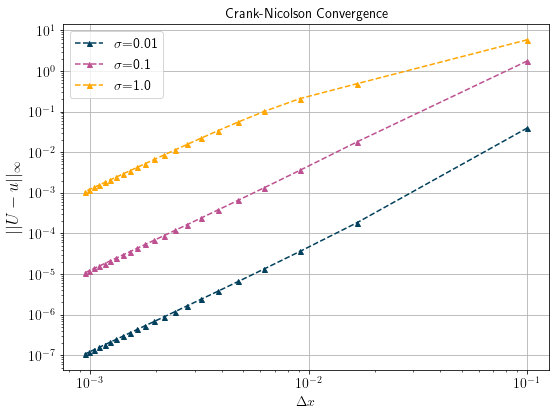

In [8]:
from advdiff.model import Diffusion

def analytic(x, t, κ=3e-3, μ = 0.5):
    return (4*κ*np.pi*t)**-0.5*np.exp(-(x-μ)**2/(4*κ*t))

params     = {'L':1,'nx':100,'nt':25}
diff_param = {'κ':3e-1, 'σ':.75,'tol':1e-10}

nxs = np.arange(10,1100,50)
sigams = np.logspace(-2,0,3)
err = np.zeros((sigams.shape[0],nxs.shape[0]))

for i, nx in enumerate(nxs):
    for j, sigma in enumerate(sigams):
        params['nx'] = nx
        diff_param['σ'] = sigma
        model = Diffusion(params,diff_param)
        model.U[0,:] = analytic(model.x,0.01,diff_param['κ'])             
        CN = model.run('crank_nicolson','w')

        exact = np.zeros_like(CN)
        for t in range(model.nt):
            exact[t,:] = analytic(model.x,t*model.dt+0.01,diff_param['κ'])

        err[j,i] = LA.norm(CN - exact,2)    

fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.loglog(1/nxs,err[0],'^--',color='#003f5c',label=r'$\sigma$={}'.format(sigams[0]), markersize=5)
ax.loglog(1/nxs,err[1],'^--',color='#bc5090',label=r'$\sigma$={}'.format(sigams[1]), markersize=5)
ax.loglog(1/nxs,err[2],'^--',color='#ffa600',label=r'$\sigma$={}'.format(sigams[2]), markersize=5)

ax.grid()
plt.legend()
ax.set_ylabel(r'$||U-u||_\infty$',fontsize='large')
ax.set_xlabel(r'$\Delta x$')
ax.set_title(r'Crank-Nicolson Convergence')
plt.tight_layout()

__Note__: $U$ is the numerical solution while $u$ is the analytical solution. 

The convergence test shows the accuracy of the solution increases with decreasing $\Delta x$ and $\Delta t$, as we might expect. While Crank-Nicolson may be stable for all timesteps and gridcell sizes, it is not necessarily accurate. We are computed matrix infinity norm thereby comparing the numerical and analytical solution at all timesteps for all girdcells. The tolerance of the linear solver is set to $1 \times 10^{-10}$ reduce the error from the linear solver and make the error dependence on the $\Delta x$ and $\Delta t$ more apparent. 

## References  

- __Barba et al.,__ (2018). _CFD Python: the 12 steps to Navier-Stokes equations_. Journal of Open Source Education, 1(9), 21, https://doi.org/10.21105/jose.00021 

- __Langtangen and  Linge.__ (2016) Finite Difference Computing with PDEs - A Modern Software Approach, Texts in Computational Science and Engineering, Springer,https://doi.org/10.1007/978-3-319-55456-3  

- __LeVeque, Randall J.__ (2002). \textit{Finite Volume Methods for Hyperbolic Problems}. Cambridge Texts in Applied Mathematics. Cambridge: Cambridge University Press. doi:10.1017/CBO9780511791253.

- __LeVeque, Randall J.__ (2007). _Finite Difference Methods for Ordinary and Partial Differential Equations: Steady-State and Time-dependent Problems_. Classics in Applied Mathematics. Society of Industrial and Applied Mathematics (SIAM). doi:10.1137/1.9780898717839

- __Trefethen and Bau__ (1997). _Numerical Linear Algebra_  Society of Industrial and Applied Mathematics (SIAM). 